###Install Library

In [10]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


###Import Library

In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# Load dataset

In [13]:
df = pd.read_csv('/content/Sentimen.csv', sep=';', encoding='latin1')

# Data Cleaning

In [14]:
df['Comment'] = df['Comment'].str.lower()
df['Comment'] = df['Comment'].astype(str)

# Sentiment Analysis

In [15]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Comment'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positif' if x >= 0 else 'negatif')


# Import os NLTK

In [21]:
import os
nltk_data_path = os.path.expanduser('~/nltk_data/tokenizers/punkt')
print(os.listdir(nltk_data_path))


['english.pickle', 'README', 'spanish.pickle', 'estonian.pickle', 'PY3', 'russian.pickle', 'italian.pickle', 'swedish.pickle', 'turkish.pickle', 'malayalam.pickle', 'german.pickle', 'portuguese.pickle', 'french.pickle', 'polish.pickle', 'slovene.pickle', 'greek.pickle', 'finnish.pickle', 'norwegian.pickle', '.DS_Store', 'dutch.pickle', 'danish.pickle', 'czech.pickle']


In [22]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['Tokens'] = df['Comment'].apply(tokenizer.tokenize)


# Stopword Removal

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming

In [25]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokenizer(text):
    return [stemmer.stem(word) for word in text]

df['Tokens'] = df['Tokens'].apply(stem_tokenizer)

# Visualisasi

In [26]:
positif = df[df['Sentiment'] == 'positif']
negatif = df[df['Sentiment'] == 'negatif']

# Bar Chart

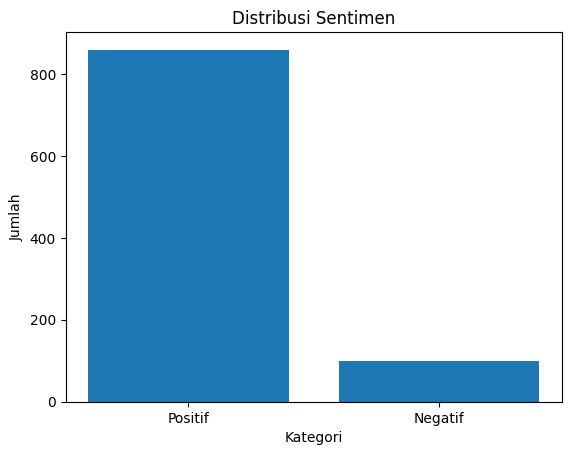

In [44]:
plt.bar([0, 1], [len(positif), len(negatif)])
plt.xticks([0, 1], ['Positif', 'Negatif'])
plt.title("Distribusi Sentimen")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()


# WordClouds Gabungkan semua teks sentimen positif dan negatif

In [32]:
pos_text = ' '.join(positif['Comment'])
neg_text = ' '.join(negatif['Comment'])

# WordCloud Sentimen Positif

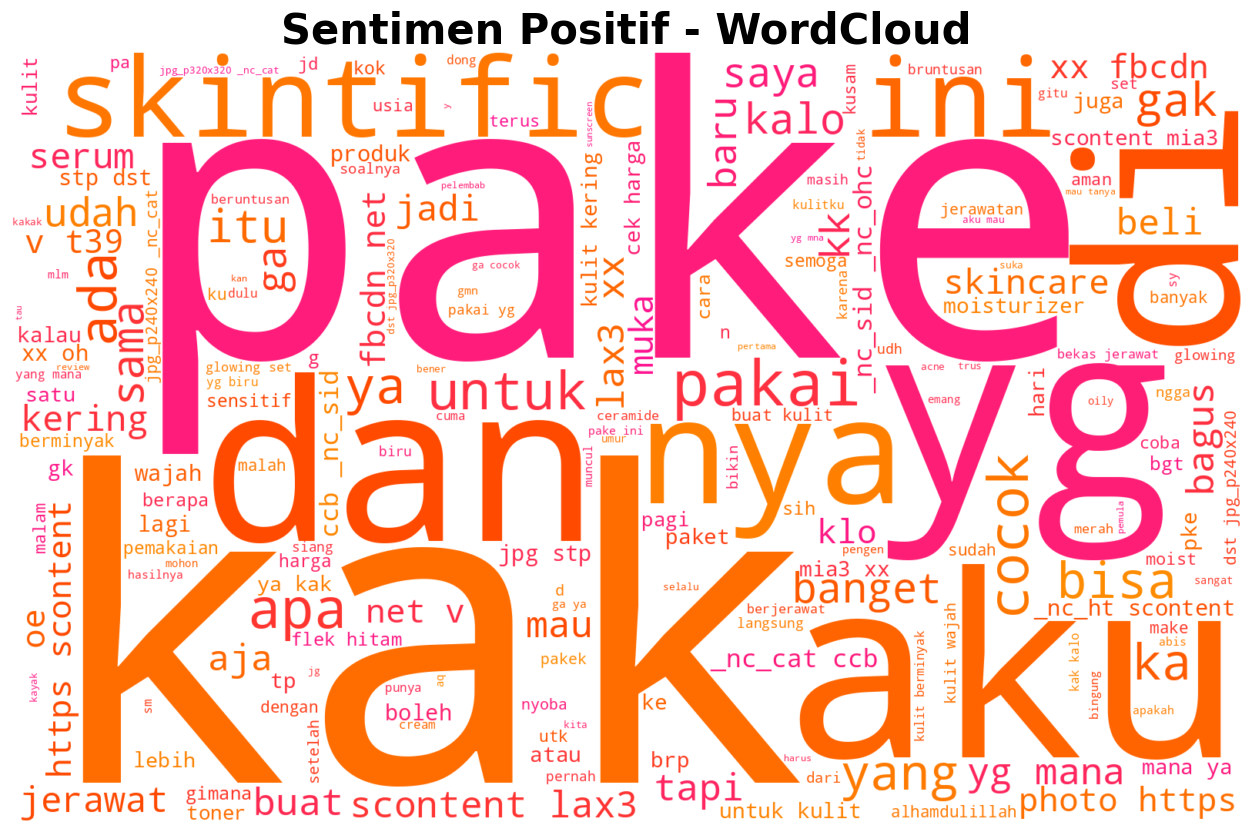

In [45]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Membuat gradasi warna
colors = LinearSegmentedColormap.from_list("custom_colormap", ["#ff8c00", "#ff4500", "#ff1493"])

# Membuat WordCloud
wc_pos = WordCloud(
    width=1600,
    height=1000,
    background_color="white",
    colormap=colors,  # Warna gradien
    max_words=200,  # Maksimum jumlah kata
    contour_width=3,
    contour_color='blue',  # Warna garis tepi
    prefer_horizontal=0.8  # Lebih banyak kata horizontal
).generate(pos_text)

# Visualisasi WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Positif - WordCloud", size=30, fontweight="bold")
plt.show()


# WordCloud Sentimen Negatif

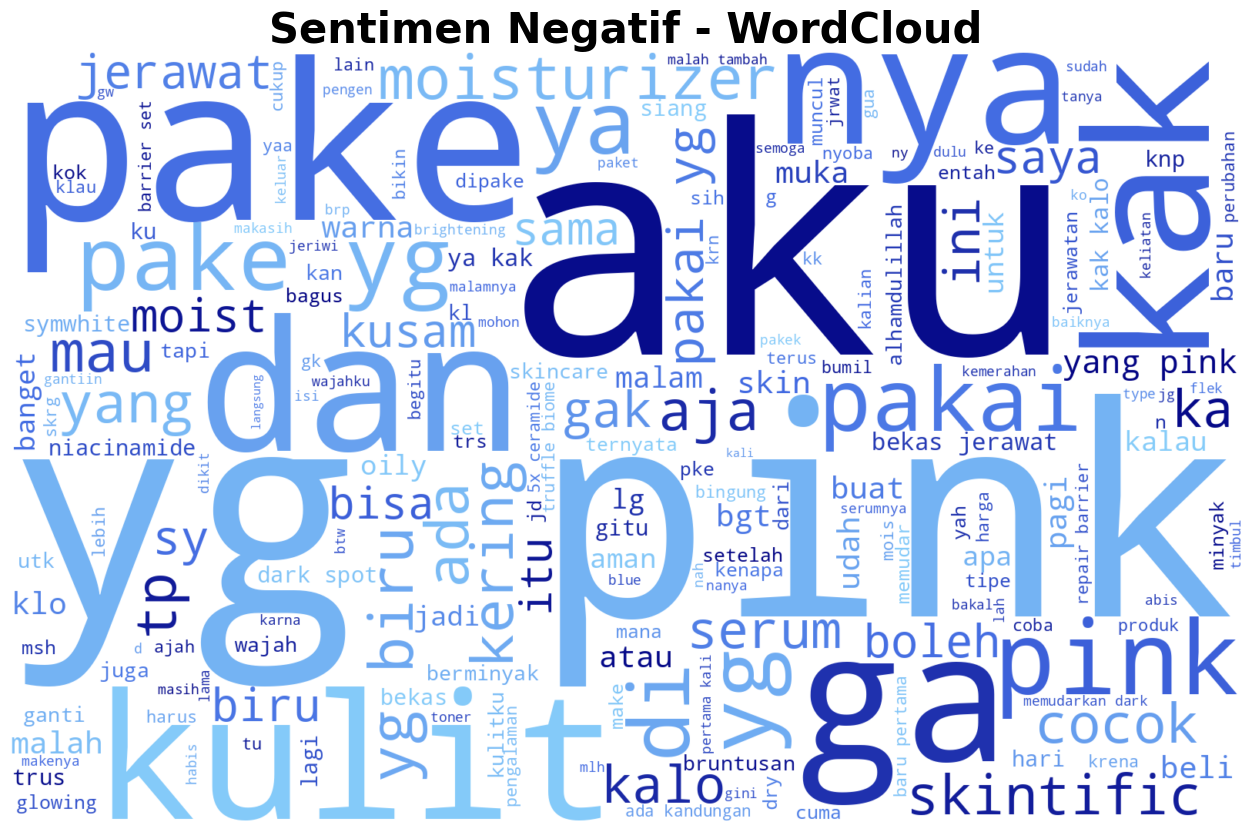

In [46]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Membuat gradasi warna
colors_neg = LinearSegmentedColormap.from_list("neg_colormap", ["#000080", "#4169e1", "#87cefa"])

# Membuat WordCloud untuk Sentimen Negatif
wc_neg = WordCloud(
    width=1600,
    height=1000,
    background_color="white",  # Latar belakang putih
    colormap=colors_neg,  # Warna gradasi biru
    max_words=200,  # Maksimum jumlah kata
    contour_width=3,
    contour_color='darkblue',  # Garis tepi biru tua
    prefer_horizontal=0.7  # Sedikit lebih banyak kata horizontal
).generate(neg_text)

# Visualisasi WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Negatif - WordCloud", size=30, fontweight="bold")
plt.show()


In [34]:
# TF-IDF
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(df['Comment'])

# Frekuensi Kemunculan

In [35]:
idf_values = tfidf.idf_
word_idf = dict(zip(tfidf.get_feature_names_out(), idf_values))

# Menampilkan 10 kata dengan nilai IDF tertinggi

In [36]:
top_idf_words = sorted(word_idf.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Kata dengan Nilai IDF Tertinggi:")
for word, idf in top_idf_words:
    print(f'Kata: {word}, IDF: {idf}')

Top 10 Kata dengan Nilai IDF Tertinggi:
Kata: 000harga, IDF: 7.172743894323493
Kata: 000https, IDF: 7.172743894323493
Kata: 00_afaaurfhbu9ioq6vdng, IDF: 7.172743894323493
Kata: 00_afac49lhstpqc22e9fxvsxu1b6wludkwdgdzge2csa6xwg, IDF: 7.172743894323493
Kata: 00_afadu39zaqpjcksyowuvwfjpcrptlaq0ajobi, IDF: 7.172743894323493
Kata: 00_afahfz1exo3xd5perkloazz2_f0exuimfpdtm2pn7endag, IDF: 7.172743894323493
Kata: 00_afajtxqivusgwcogkptruiitp7v8rha6316x4gvn8x_mxq, IDF: 7.172743894323493
Kata: 00_afakeked3y6e61svwuihd_xlkwozbhsrsscdio0lyyjr9g, IDF: 7.172743894323493
Kata: 00_afardupt_jqas3omql9qlju6inyyk_8jv44wpbeldbz3, IDF: 7.172743894323493
Kata: 00_afatx61cr4mn3q92_yfvm8tognc5icfrqhlglkjruq7bdw, IDF: 7.172743894323493


# SVM Model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['Sentiment'], test_size=0.2, random_state=0)

clf = svm.SVC(kernel='linear')  # Gunakan kernel linear untuk teks
clf.fit(X_train, y_train)

SVC(kernel='linear')

# Accuracy Score

In [38]:
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9479166666666666


# Classification Report

In [48]:

pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     negatif       0.86      0.60      0.71        20
     positif       0.96      0.99      0.97       172

    accuracy                           0.95       192
   macro avg       0.91      0.79      0.84       192
weighted avg       0.94      0.95      0.94       192



# Evaluation Metrics and Plot

In [40]:
acc_score = accuracy_score(y_test, pred)
pre_score = precision_score(y_test, pred, average='weighted')
rec_score = recall_score(y_test, pred, average='weighted')
f_score = f1_score(y_test, pred, average='weighted')

# Plot Evaluasi

In [41]:
scores = {
    'Accuracy': acc_score,
    'Precision': pre_score,
    'Recall': rec_score,
    'F-Measure': f_score
}

eval_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

# Plot Grafik Garis

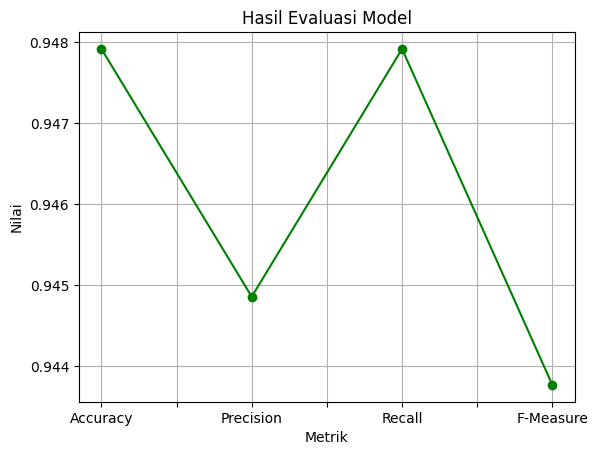

In [55]:
eval_df['Score'].plot(kind='line', marker='o', color='green')

plt.title('Hasil Evaluasi Model')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.grid(True)
plt.show()